In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset -> data matrix

In [410]:
# n = 5
# m = 2
# data = np.random.rand(n, m)
# data

mean = [3, 4]
AAT = [[1,3],[3,12]]
data = np.random.default_rng().multivariate_normal(mean, AAT, 3000)

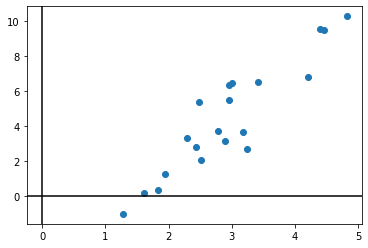

In [411]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])

## Preprocessing

In [412]:
# Shift coordinate -> Normalize 

data = data - data.mean(axis = 0)

[ 2.22044605e-17 -1.06581410e-15]


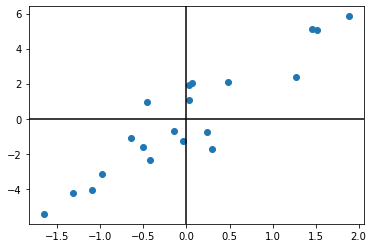

In [413]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])
print(data.mean(axis=  0))

## Calculate the SVD:
$$
A * A^T = U \Sigma V^T V \Sigma^T U^T = U * \Sigma * \Sigma^T * U^T
$$
$$
A^T * A = V \Sigma^T U^T * U \Sigma V^T = V \Sigma^T * \Sigma * V^T
$$

Thus: Eigenvalues of $A^T * A$ are $\sigma^2$, the eigen vectors are the columns of V

In [414]:
# Calculate the SVD
u, sigma, v = np.linalg.svd(data, full_matrices=False)
print(u.shape)
#sigma = np.diag(sigma)
print(sigma.shape)
print(v.shape)
#u, sigma, v

(20, 2)
(2,)
(2, 2)


# Principal components

In [415]:
# Each column of V is an eigenvector  of A.T @ A
print("Eigen values, " ,sigma ** 2)
print("Eigen vectors (rows)", v.T)

Eigen values,  [210.40325136   2.51192833]
Eigen vectors (rows) [[ 0.27031051  0.9627732 ]
 [ 0.9627732  -0.27031051]]


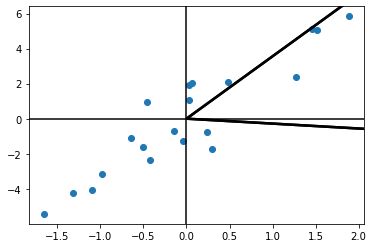

In [416]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])
for a in v.T:
    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy',scale=1)

In [417]:
def scatter_with_axes(data):
    plt.axhline(color='black')
    plt.axvline(color='black')
    plt.scatter(x = data[:, 0], y = data[:, 1])

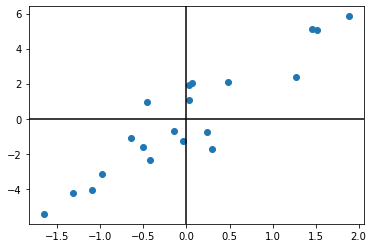

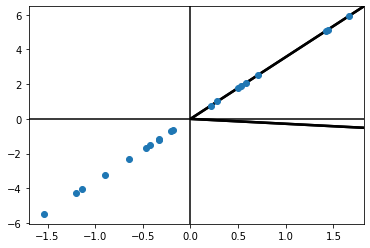

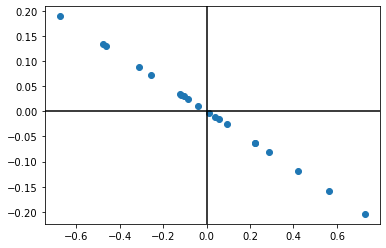

In [418]:
# sub is a vector
def project(x,sub):
    tmp = sub.reshape((-1))
    return (x @ sub / tmp.dot(tmp)) * tmp
    

k = 1
u = v[:, 0:1]
u2 = v[:, 1:2]

x = project(data, u)
x1 = project(data, u2)

scatter_with_axes(data)


plt.figure()
for a in v.T:
    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy',scale=1)
scatter_with_axes(x)

plt.figure()
scatter_with_axes(x1)
